In [ ]:
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

Here is the code to load the data:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


In [ ]:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [3]:
boston=load_boston()

C:\Users\adema\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
data=boston.data
type(data)

numpy.ndarray

In [10]:
data.shape

(506, 13)

In [11]:
bos=pd.DataFrame(data=data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bos['Price']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

Data Visualization

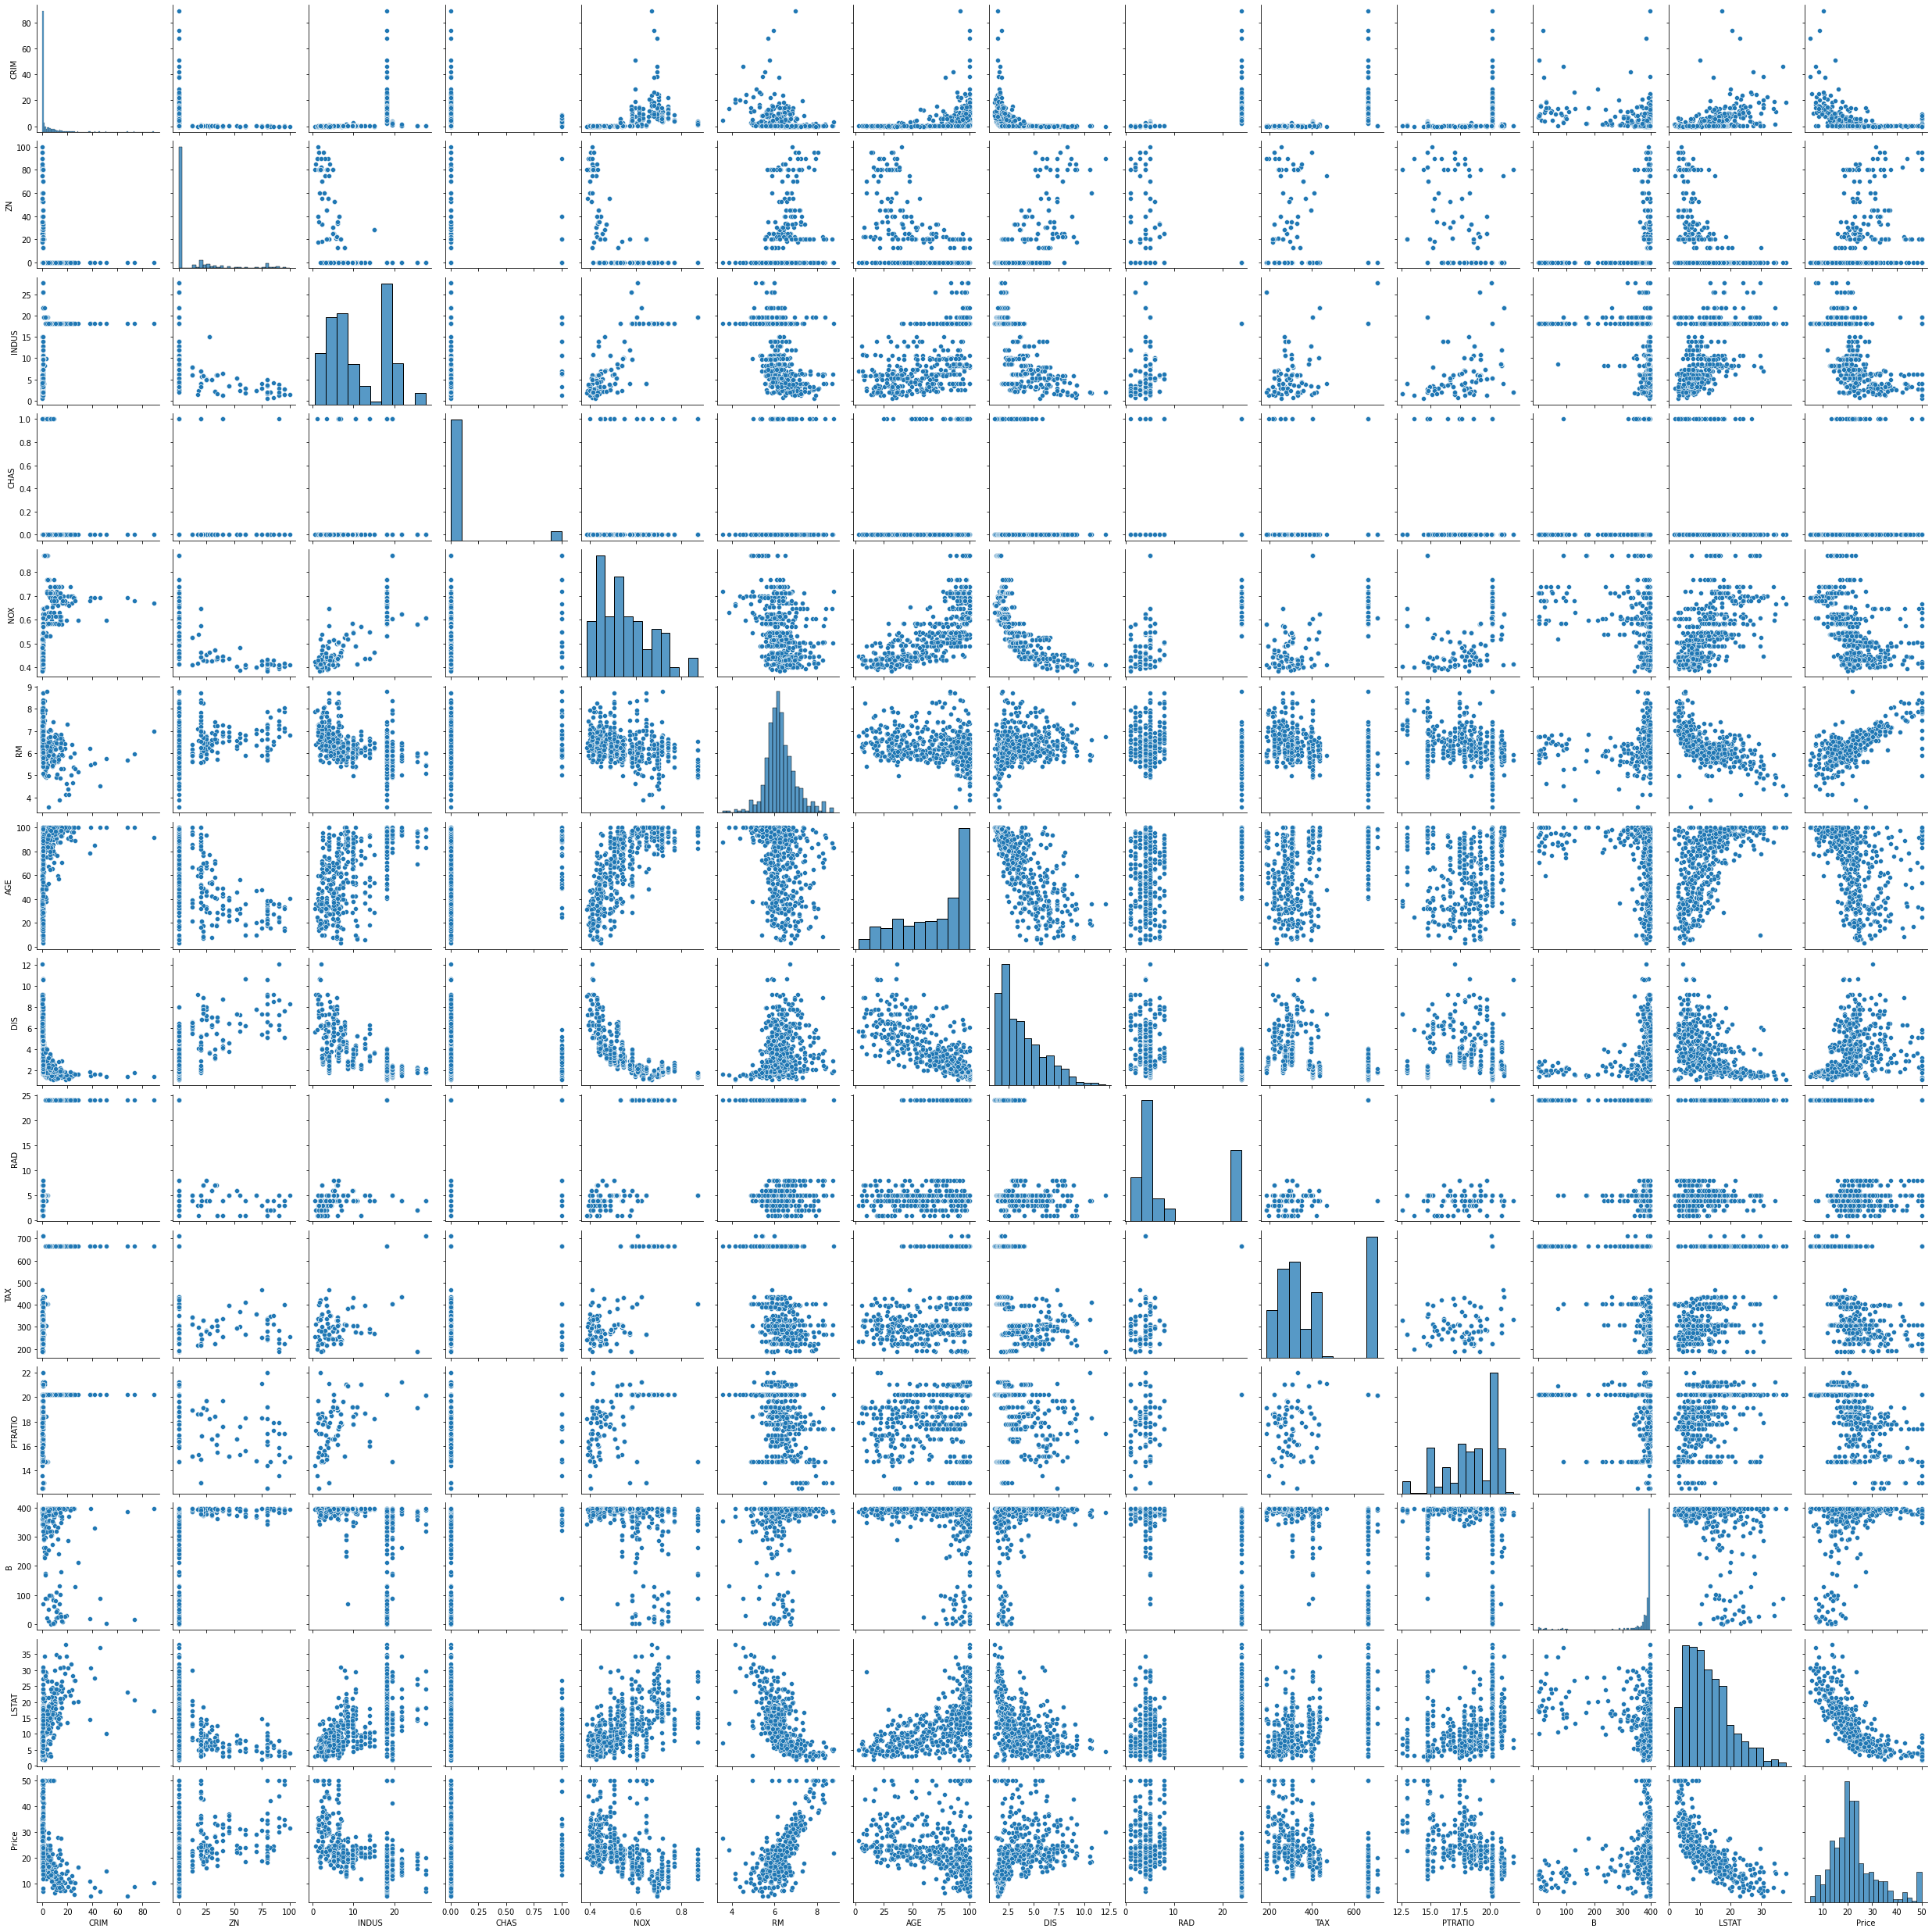

In [16]:
sns.pairplot(bos)

C:\Users\adema\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adema\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adema\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

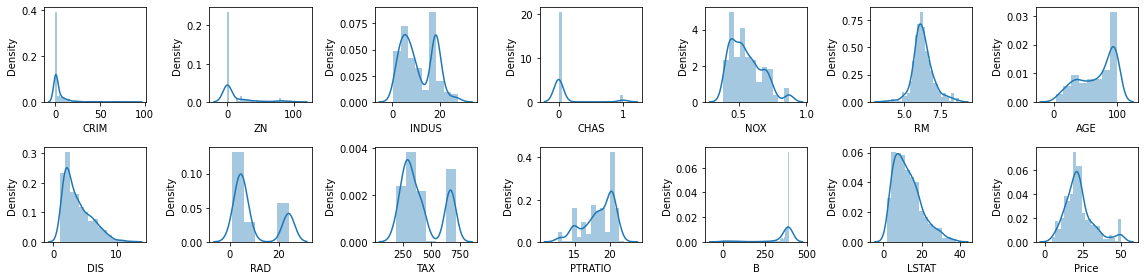

In [17]:
rows=2
cols=7

fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))

col=bos.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(bos[col[index]],ax=ax[i][j])
        index=index+1

plt.tight_layout()

In [18]:
corr=bos.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

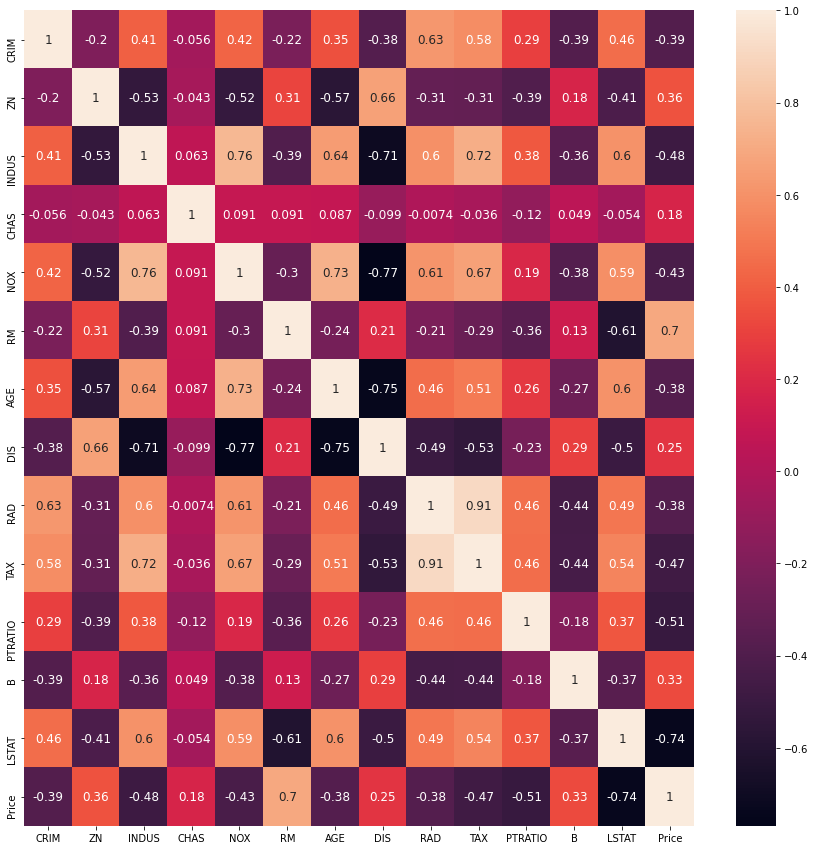

In [19]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True,annot_kws={'size': 12})

In [20]:
corr.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [21]:
def getCorrelatedFeature(corr, threshold):
    feature=[]
    value=[]
    
    for i,index in enumerate(corr.index):
        if abs(corr[index])>threshold:
            feature.append(index)
            value.append(corr[index])
            
    df=pd.DataFrame(data=value,index=feature,columns=['corr value'])
    return df

In [22]:
threshold=0.50
corr_value=getCorrelatedFeature(corr['Price'],threshold)
corr_value

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [23]:
correlated_data=bos[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


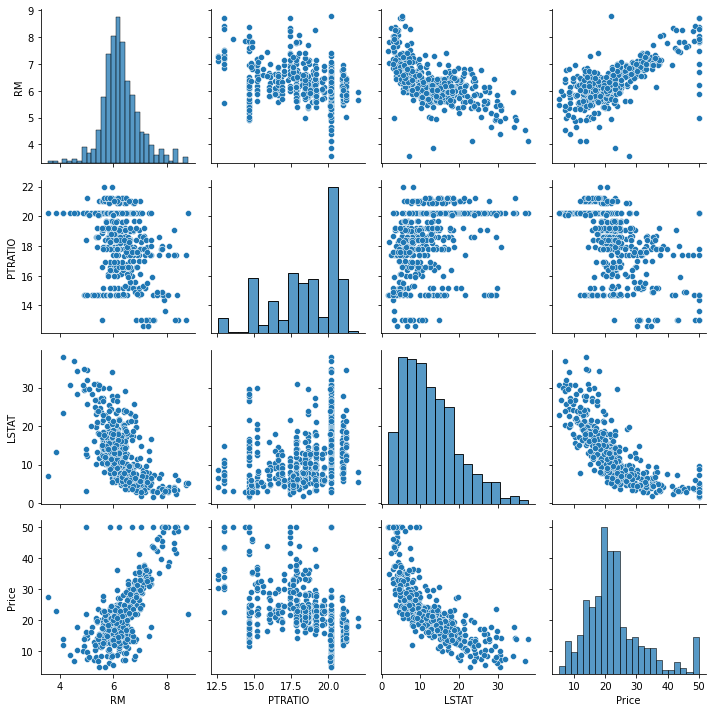

In [24]:
sns.pairplot(correlated_data)
plt.tight_layout()

<AxesSubplot:>

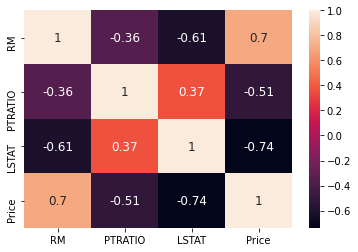

In [25]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':12})


Shuffle and split data

In [26]:
X=correlated_data.drop(labels=['Price'],axis=1)
y=correlated_data['Price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 3)
(102, 3)
(404,)
(102,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_predict=model.predict(X_test)

In [31]:
df=pd.DataFrame(data = [y_predict,y_test])
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


In [32]:
from sklearn.metrics import r2_score

In [33]:
score=r2_score(y_test, y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)

print('r2_score:', score)
print('mae :', mae)
print('mse :', mse)

r2_score: 0.48816420156925067
mae : 4.404434993909257
mse : 41.67799012221683


store feature performance

In [34]:
total_features=[]
total_features_name=[]
selected_correlation_value=[]
r2_scores=[]
mae_value=[]
mse_value=[]

In [35]:
def performance_metrics(features,th,y_true,y_pred):
    score=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_DataFrame=pd.DataFrame(data=[total_features_name,total_features,selected_correlation_value,r2_scores,mae_value,mse_value]
                                  ,index=['features name','#feature','corr_value','r2_score','MAE','MSE'])
    return metrics_DataFrame.T

In [36]:
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678


regression plot of features correlated with house price

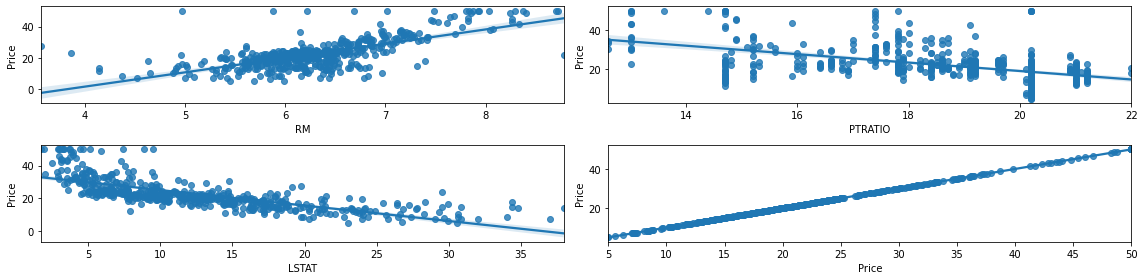

In [37]:
rows=2
cols=2
fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))

col=correlated_data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x=correlated_data[col[index]],y=correlated_data['Price'],ax=ax[i][j])
        index=index+1
fig.tight_layout()

To get accuracy with more than 60%

In [38]:
corr['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [39]:
threshold=0.6
corr_value=getCorrelatedFeature(corr['Price'],threshold)
corr_value

,corr value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [40]:
def get_y_predict(corrdata):
    x=corrdata.drop(labels=['Price'],axis=1)
    y=corrdata['Price']
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    return y_predict

In [41]:
y_predict=get_y_predict(correlated_data)

In [42]:
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.6,0.488164,4.40443,41.678


model with >70% accuracy

In [43]:
corr['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [44]:
threshold=0.7
corr_value=getCorrelatedFeature(corr['Price'],threshold)
corr_value

,corr value
LSTAT,-0.737663
Price,1.000000


In [45]:
correlated_data = bos[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [46]:
y_predict=get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.6,0.488164,4.40443,41.678
2,['LSTAT' 'Price'],1,0.7,0.488164,4.40443,41.678


In [47]:
correlated_data = bos[['RM','Price']]
correlated_data.head()

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [48]:
y_predict=get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.6,0.488164,4.40443,41.678
2,['LSTAT' 'Price'],1,0.7,0.488164,4.40443,41.678
3,['RM' 'Price'],1,0.7,0.488164,4.40443,41.678


>40%

In [49]:
threshold=0.4
corr_value=getCorrelatedFeature(corr['Price'],threshold)
corr_value

,corr value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [50]:
correlated_data = bos[corr_value.index]
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [51]:
y_predict=get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.6,0.488164,4.40443,41.678
2,['LSTAT' 'Price'],1,0.7,0.488164,4.40443,41.678
3,['RM' 'Price'],1,0.7,0.488164,4.40443,41.678
4,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'P...,6,0.4,0.488164,4.40443,41.678


scaling

In [53]:
model=LinearRegression(normalize=True)
model.fit(X_train,y_train)

C:\Users\adema\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [54]:
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)

0.48816420156925067

plotting learning curves

In [81]:
from sklearn.model_selection import learning_curve,ShuffleSplit

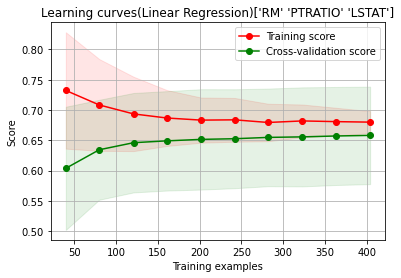

In [84]:
def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,cv=cv,n_jobs=n_jobs,
                                                                        train_sizes=train_sizes)
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
        
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g")
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot( train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    plt.legend(loc="best")
  
    return plt


x=correlated_data.drop(labels=['Price'],axis=1)
y=correlated_data['Price']

title="Learning curves(Linear Regression)"+str(X.columns.values)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()